In [1]:
#pip install tpot

# IMPORTS / CREATION DATASET

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.pipeline import make_pipeline, make_union
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from tpot import *
from xgboost import *
from sklearn.ensemble import *
from sklearn.svm import *
import seaborn as sns 

/Users/mathieudbt/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
df_tmp = pd.read_csv('../raw_data/data_clean0312.csv')
df_tmp

,steam_appid,name,release_date,developer,publisher,pub_nb_games,owner_median,recommended,english,price,has_a_website,nb_review,owner_estimated,rating,popularity,revenu
0,7340,Azada,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,0,1,6.99,1,12,2496.0,10.228571,13.635714,17447.04
1,50910,Professor Fizzwizzle and the Molten Mystery,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,0,1,4.99,1,12,2496.0,10.228571,13.635714,12455.04
2,50920,Hidden Expedition: Amazon,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,0,1,6.99,1,12,2496.0,10.228571,13.635714,17447.04
3,50930,Hidden Expedition: Everest,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,0,1,6.99,1,5,1040.0,10.228571,13.635714,7269.60
4,50940,Hidden Expedition: Titanic,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,0,1,6.99,1,6,1248.0,10.228571,13.635714,8723.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26794,1060770,"Die, zombie sausage, die!",2019-04-24,AuroraCorp,Aurora software,1,10000.0,1,1,0.79,0,1,208.0,1.000000,1.000000,164.32
26795,858100,Grimshade,2019-03-26,TALEROCK,Asterion Games,1,10000.0,1,1,15.99,1,86,17888.0,58.800000,74.100000,286029.12
26796,832420,ICED VR,2018-05-29,Anea_Duo_Dev,Anea_Duo_Dev,1,10000.0,1,1,7.19,0,9,1872.0,44.450000,69.650000,13459.68
26797,659100,Skyfall,2017-07-28,AYE Technology,AYE Technology,1,10000.0,1,1,2.79,0,24,4992.0,-4.600000,6.800000,13927.68


,steam_appid,name,release_date,developer,publisher,pub_nb_games,owner_median,recommended,english,price,has_a_website,nb_review,owner_estimated,rating,popularity,revenu
1363,286440,Rover Rescue,2014-05-08,Pointscape,KISS ltd,71,150000.0,0,1,3.99,1,89,102937.0,-0.6,49.8,410718.63


In [153]:
tmp[tmp['developer']=='Pointscape']

KeyError: 'developer'

In [3]:
df_tmp.dtypes

steam_appid          int64
name                object
release_date        object
developer           object
publisher           object
pub_nb_games         int64
owner_median       float64
recommended          int64
english              int64
price              float64
has_a_website        int64
nb_review            int64
owner_estimated    float64
rating             float64
popularity         float64
revenu             float64
dtype: object

In [4]:
a_df = df_tmp[df_tmp['owner_median']< 100000]

In [5]:
b_df = df_tmp[df_tmp['owner_median']< 50000]

In [6]:
c_df = df_tmp[df_tmp['owner_median']< 20000]

In [59]:
#a_df.to_csv(r'../raw_data/df_100k.csv', index = False)

In [7]:
#b_df.to_csv(r'../raw_data/df_50k.csv', index = False)

In [8]:
#c_df.to_csv(r'../raw_data/df_20k.csv', index = False)

____

<AxesSubplot:xlabel='price', ylabel='nb_review'>

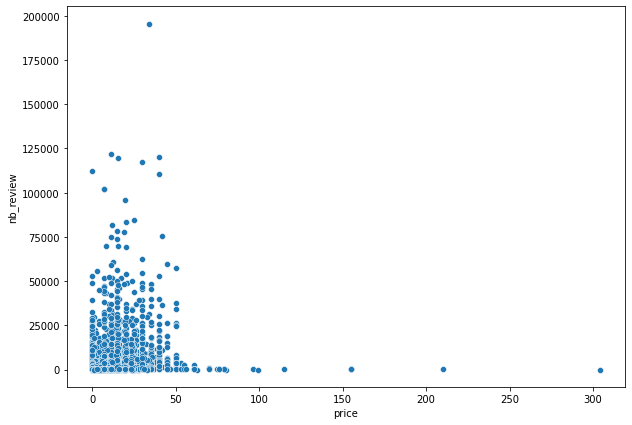

In [129]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x="price", y="nb_review",
                palette='deep',
                sizes=(10, 300), data=df_tmp)

In [133]:
b_df[['price', 'nb_review','has_a_website', 'owner_median']].corr().style.background_gradient(cmap='coolwarm', text_color_threshold = 0.700 )

,price,nb_review,has_a_website,owner_median
price,1.000000,0.245903,0.140823,0.061688
nb_review,0.245903,1.000000,0.111650,0.521611
has_a_website,0.140823,0.111650,1.000000,0.082818
owner_median,0.061688,0.521611,0.082818,1.000000


_____

# TEST Modèles sur différents datasets

## Test sur a_df ( < 100 k) 

### Pipeline w/ Ridge

In [62]:
a_df.columns

Index(['steam_appid', 'name', 'release_date', 'developer', 'publisher',
       'pub_nb_games', 'owner_median', 'recommended', 'english', 'price',
       'has_a_website', 'nb_review', 'owner_estimated', 'rating', 'popularity',
       'revenu'],
      dtype='object')

In [9]:
Xa = a_df.drop(columns=['steam_appid','popularity','release_date','revenu', 'developer', 'publisher','release_date','owner_median', 'owner_estimated','name', 'rating', 'nb_review'])

In [10]:
ya = a_df['owner_estimated']

In [11]:
# Division du dataset 70/30

Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa,ya, test_size = 0.3, random_state=0)

In [12]:
# Column transformer / Encoder / Création du Pipeline

num_transformer = make_pipeline(SimpleImputer(), StandardScaler())
num_col = make_column_selector(dtype_include=['float64','int64'])

cat_transformer = OneHotEncoder()
cat_col = make_column_selector(dtype_include=['object','bool'])

preproc_basic = make_column_transformer(
    (num_transformer, num_col),
    (cat_transformer, cat_col))

pipe = make_pipeline(preproc_basic, Ridge())

In [13]:
# Fit
pipe.fit(Xa_train,ya_train)

# Make predictions
pipe.predict(Xa_test)

# Score model
pipe.score(Xa_test,ya_test)


0.04835759406106643

In [14]:
Xa_train.columns

Index(['pub_nb_games', 'recommended', 'english', 'price', 'has_a_website'], dtype='object')

### TPOT

In [18]:
# instanciate TPOTClassifier
tpot = TPOTRegressor(generations=4, population_size=50, verbosity=2, scoring='r2', n_jobs=-1, cv=2)
# process autoML with TPOT
tpot.fit(Xa_train, ya_train)

# print score
print(tpot.score(Xa_test, ya_test))

Optimization Progress:   0%|          | 0/250 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.14024029326423637

Generation 2 - Current best internal CV score: 0.14707004843673854

Generation 3 - Current best internal CV score: 0.14707004843673854

Generation 4 - Current best internal CV score: 0.14707004843673854

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.8, min_samples_leaf=3, min_samples_split=12, n_estimators=100)
0.167588125604752


## Test sur b_df ( < 50K )

In [15]:
Xb = b_df.drop(columns=['steam_appid','popularity','release_date','revenu', 'developer', 'publisher','release_date','owner_median', 'owner_estimated','name', 'rating', 'nb_review'])

In [16]:
yb = b_df['owner_estimated']

In [17]:
# Division du dataset 70/30

Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb,yb, test_size = 0.3, random_state=0)

### Pipeline w/ridge

In [18]:
num_transformer = make_pipeline(SimpleImputer(), StandardScaler())
num_col = make_column_selector(dtype_include=['float64','int64'])

cat_transformer = OneHotEncoder()
cat_col = make_column_selector(dtype_include=['object','bool'])

preproc_basic = make_column_transformer(
    (num_transformer, num_col),
    (cat_transformer, cat_col))

pipe = make_pipeline(preproc_basic, Ridge())

In [19]:
pipe.fit(Xb_train,yb_train)

# Make predictions
pipe.predict(Xb_test)

# Score model
pipe.score(Xb_test,yb_test)


0.05921240924379301

### TPOT

In [20]:
# instanciate TPOTClassifier
tpot = TPOTRegressor(generations=4, population_size=50, verbosity=2, scoring='r2', n_jobs=-1, cv=2)
# process autoML with TPOT
tpot.fit(Xb_train, yb_train)

# print score
print(tpot.score(Xb_test, yb_test))

Optimization Progress:   0%|          | 0/250 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.15357269084778913

Generation 2 - Current best internal CV score: 0.15357269084778913

Generation 3 - Current best internal CV score: 0.15357269084778913

Generation 4 - Current best internal CV score: 0.15957124960282976

Best pipeline: RidgeCV(XGBRegressor(input_matrix, learning_rate=1.0, max_depth=2, min_child_weight=15, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.8500000000000001, verbosity=0))
0.16148356385804974


## Test sur c_df ( < 20K )

In [21]:
Xc = c_df.drop(columns=['steam_appid','popularity','release_date','revenu', 'developer', 'publisher','release_date','owner_median', 'owner_estimated','name', 'rating', 'nb_review'])

In [22]:
yc = c_df['owner_estimated']

In [23]:
# Division du dataset 70/30

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc,yc, test_size = 0.3, random_state=0)

In [24]:
pipe.fit(Xc_train,yc_train)

# Make predictions
pipe.predict(Xc_test)

# Score model
pipe.score(Xc_test,yc_test)

0.035244238236621706

### TPOT

In [25]:
# instanciate TPOTClassifier
tpot = TPOTRegressor(generations=4, population_size=50, verbosity=2, scoring='r2', n_jobs=-1, cv=2)
# process autoML with TPOT
tpot.fit(Xc_train, yc_train)

# print score
print(tpot.score(Xc_test, yc_test))

Optimization Progress:   0%|          | 0/250 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.14751743650837817

Generation 2 - Current best internal CV score: 0.14757901859908684

Generation 3 - Current best internal CV score: 0.14757901859908684

Generation 4 - Current best internal CV score: 0.14757901859908684

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.9000000000000001, verbosity=0)
0.151421133968482


/Users/mathieudbt/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/Users/mathieudbt/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/Users/mathieudbt/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/Users/mathieudbt/.pyenv/versions/3.8.12

#  *Conclusion : on a de meilleurs résultats sur le dataset < 100 et < 50*

# AJUSTEMENT DES DATASETS PAR LE PRIX DES JEUX ( < 1 €)

## Test sur a_df

In [79]:
a_df

,steam_appid,name,release_date,developer,publisher,pub_nb_games,owner_median,recommended,english,price,has_a_website,nb_review,owner_estimated,rating,popularity,revenu
0,7340,Azada,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,0,1,6.99,1,12,2496.0,10.228571,13.635714,17447.04
1,50910,Professor Fizzwizzle and the Molten Mystery,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,0,1,4.99,1,12,2496.0,10.228571,13.635714,12455.04
2,50920,Hidden Expedition: Amazon,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,0,1,6.99,1,12,2496.0,10.228571,13.635714,17447.04
3,50930,Hidden Expedition: Everest,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,0,1,6.99,1,5,1040.0,10.228571,13.635714,7269.60
4,50940,Hidden Expedition: Titanic,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,0,1,6.99,1,6,1248.0,10.228571,13.635714,8723.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26794,1060770,"Die, zombie sausage, die!",2019-04-24,AuroraCorp,Aurora software,1,10000.0,1,1,0.79,0,1,208.0,1.000000,1.000000,164.32
26795,858100,Grimshade,2019-03-26,TALEROCK,Asterion Games,1,10000.0,1,1,15.99,1,86,17888.0,58.800000,74.100000,286029.12
26796,832420,ICED VR,2018-05-29,Anea_Duo_Dev,Anea_Duo_Dev,1,10000.0,1,1,7.19,0,9,1872.0,44.450000,69.650000,13459.68
26797,659100,Skyfall,2017-07-28,AYE Technology,AYE Technology,1,10000.0,1,1,2.79,0,24,4992.0,-4.600000,6.800000,13927.68


In [80]:
a_df.drop(a_df[a_df.price < 1].index, inplace=True)


/Users/mathieudbt/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
a_df

,steam_appid,name,release_date,developer,publisher,pub_nb_games,owner_median,recommended,english,price,has_a_website,nb_review,owner_estimated,rating,popularity,revenu
0,7340,Azada,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,0,1,6.99,1,12,2496.0,10.228571,13.635714,17447.04
1,50910,Professor Fizzwizzle and the Molten Mystery,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,0,1,4.99,1,12,2496.0,10.228571,13.635714,12455.04
2,50920,Hidden Expedition: Amazon,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,0,1,6.99,1,12,2496.0,10.228571,13.635714,17447.04
3,50930,Hidden Expedition: Everest,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,0,1,6.99,1,5,1040.0,10.228571,13.635714,7269.60
4,50940,Hidden Expedition: Titanic,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,0,1,6.99,1,6,1248.0,10.228571,13.635714,8723.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26794,1060770,"Die, zombie sausage, die!",2019-04-24,AuroraCorp,Aurora software,1,10000.0,1,1,0.79,0,1,208.0,1.000000,1.000000,164.32
26795,858100,Grimshade,2019-03-26,TALEROCK,Asterion Games,1,10000.0,1,1,15.99,1,86,17888.0,58.800000,74.100000,286029.12
26796,832420,ICED VR,2018-05-29,Anea_Duo_Dev,Anea_Duo_Dev,1,10000.0,1,1,7.19,0,9,1872.0,44.450000,69.650000,13459.68
26797,659100,Skyfall,2017-07-28,AYE Technology,AYE Technology,1,10000.0,1,1,2.79,0,24,4992.0,-4.600000,6.800000,13927.68


In [27]:
Xaa = a_df.drop(columns=['steam_appid','popularity','release_date','revenu', 'developer', 'publisher','release_date','owner_median', 'owner_estimated','name', 'rating', 'nb_review'])

In [28]:
yaa = a_df['owner_estimated']

In [29]:
Xaa_train, Xaa_test, yaa_train, yaa_test = train_test_split(Xaa,yaa, test_size = 0.3, random_state=0)

In [38]:

forest = RandomForestRegressor(
                               bootstrap=True, 
                               max_features=0.4, 
                               min_samples_leaf=14, 
                               n_estimators=100,
                               min_samples_split=14)

linear = LinearSVR(C=0.01, 
                  dual=False, 
                  epsilon=0.001, 
                  loss='squared_epsilon_insensitive', 
                  tol=0.0001)

xgb = XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.1)

estimators = [
    ('lr', forest),
    ('svr', LinearSVR(random_state=42)),
    ('xgb', xgb)
]


ensemble = StackingRegressor(
    estimators = estimators,
    final_estimator = LinearRegression())

ensemble.fit(Xaa_train, yaa_train)

print(ensemble.score(Xaa_test,yaa_test))

0.1684189576254459


### Test TPOT

In [45]:
# instanciate TPOTClassifier
tpot = TPOTRegressor(generations=4, population_size=50, verbosity=2, scoring='r2', n_jobs=-1, cv=2)
# process autoML with TPOT
tpot.fit(Xaa_train, yaa_train)

# print score
print(tpot.score(Xaa_test, yaa_test))

Optimization Progress:   0%|          | 0/250 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.14318953254503342

Generation 2 - Current best internal CV score: 0.14318953254503342

Generation 3 - Current best internal CV score: 0.14318953254503342

Generation 4 - Current best internal CV score: 0.14731364820888965

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.8500000000000001, min_samples_leaf=4, min_samples_split=10, n_estimators=100)
0.1641885945333741


## Test sur b_df

In [40]:
b_df.drop(b_df[b_df.price < 1].index, inplace=True)


/Users/mathieudbt/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [41]:
Xbb = b_df.drop(columns=['steam_appid','popularity','release_date','revenu', 'developer', 'publisher','release_date','owner_median', 'owner_estimated','name', 'rating', 'nb_review'])

In [42]:
ybb = b_df['owner_estimated']

In [43]:
Xbb_train, Xbb_test, ybb_train, ybb_test = train_test_split(Xbb,ybb, test_size = 0.3, random_state=0)

In [44]:

forest = RandomForestRegressor(
                               bootstrap=True, 
                               max_features=0.4, 
                               min_samples_leaf=14, 
                               n_estimators=100,
                               min_samples_split=14)

linear = LinearSVR(C=0.01, 
                  dual=False, 
                  epsilon=0.001, 
                  loss='squared_epsilon_insensitive', 
                  tol=0.0001)

xgb = XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.1)

estimators = [
    ('lr', forest),
    ('svr', LinearSVR(random_state=42)),
    ('xgb', xgb)
]


ensemble = StackingRegressor(
    estimators = estimators,
    final_estimator = LinearRegression())

ensemble.fit(Xbb_train, ybb_train)

print(ensemble.score(Xbb_test,ybb_test))

0.19139351579892938


### Test TPOT

In [46]:
# instanciate TPOTClassifier
tpot = TPOTRegressor(generations=4, population_size=50, verbosity=2, scoring='r2', n_jobs=-1, cv=2)
# process autoML with TPOT
tpot.fit(Xbb_train, ybb_train)

# print score
print(tpot.score(Xbb_test, ybb_test))

Optimization Progress:   0%|          | 0/250 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.14781383997590375

Generation 2 - Current best internal CV score: 0.1500011075202312

Generation 3 - Current best internal CV score: 0.1500011075202312

Generation 4 - Current best internal CV score: 0.1500011075202312

Best pipeline: RandomForestRegressor(GradientBoostingRegressor(input_matrix, alpha=0.75, learning_rate=0.1, loss=huber, max_depth=2, max_features=0.9500000000000001, min_samples_leaf=9, min_samples_split=11, n_estimators=100, subsample=0.05), bootstrap=True, max_features=0.5, min_samples_leaf=14, min_samples_split=12, n_estimators=100)
0.18255036803603453


/Users/mathieudbt/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Users/mathieudbt/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/Users/mathieudbt/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/Users/mathieudbt/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: W

# Création des 3 datasets en rajoutant les colonnes topics 

In [50]:
a_df.columns

Index(['steam_appid', 'name', 'release_date', 'developer', 'publisher',
       'pub_nb_games', 'owner_median', 'recommended', 'english', 'price',
       'has_a_website', 'nb_review', 'owner_estimated', 'rating', 'popularity',
       'revenu'],
      dtype='object')

In [47]:
tmp = pd.read_csv('../raw_data/data_final_indé_big.csv')

In [155]:
df_tmp[df_tmp['name'] == 'Rover Rescue']

,steam_appid,name,release_date,developer,publisher,pub_nb_games,owner_median,recommended,english,price,has_a_website,nb_review,owner_estimated,rating,popularity,revenu
1363,286440,Rover Rescue,2014-05-08,Pointscape,KISS ltd,71,150000.0,0,1,3.99,1,89,102937.0,-0.6,49.8,410718.63


In [144]:
tmp.shape

(21547, 33)

In [154]:
tmp.columns

Index(['steam_appid', 'name', 'top_5_tags', 'topic_0', 'topic_1', 'topic_2',
       'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8',
       'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14',
       'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'english',
       'price', 'has_a_website', 'nb_review', 'owner_estimated', 'rating',
       'popularity', 'score_descriptif', 'average_playtime',
       'median_playtime'],
      dtype='object')

In [156]:
tmp[tmp['owner_estimated'] == 102937.0]

,steam_appid,name,top_5_tags,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,...,english,price,has_a_website,nb_review,owner_estimated,rating,popularity,score_descriptif,average_playtime,median_playtime


In [64]:
a_tmp = a_df[['steam_appid','owner_median','release_date']]

In [65]:
df_a = pd.merge(a_tmp, tmp, how="inner", on="steam_appid")

In [71]:
b_tmp = b_df[['steam_appid','owner_median','release_date']]

In [72]:
df_b = pd.merge(b_tmp, tmp, how="inner", on="steam_appid")

In [88]:
c_df.drop(c_df[c_df.price < 1].index, inplace=True)


/Users/mathieudbt/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [89]:
c_tmp = c_df[['steam_appid','owner_median','release_date']]

In [90]:
df_c = pd.merge(c_tmp, tmp, how="inner", on="steam_appid")

In [93]:
#df_c.to_csv(r'../raw_data/data_20k.csv', index = False)

In [83]:
#df_b.to_csv(r'../raw_data/data_50k.csv', index = False)

In [70]:
#df_a.to_csv(r'../raw_data/data_100k.csv', index = False)

# Test Models

In [103]:
df_a.columns

Index(['steam_appid', 'owner_median', 'release_date', 'name', 'top_5_tags',
       'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5',
       'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11',
       'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17',
       'topic_18', 'topic_19', 'english', 'price', 'has_a_website',
       'nb_review', 'owner_estimated', 'rating', 'popularity',
       'score_descriptif', 'average_playtime', 'median_playtime'],
      dtype='object')

In [109]:
X_a = df_a.drop(columns=['steam_appid','name','popularity','release_date','release_date','owner_median', 'owner_estimated','name', 'rating', 'nb_review','top_5_tags','score_descriptif', 'average_playtime', 'median_playtime'])

In [110]:
y_a = df_a['owner_median']

In [111]:
X_a_train, X_a_test, y_a_train, y_a_test = train_test_split(X_a, y_a, test_size=0.3, random_state=0)

In [112]:
X_a.columns

Index(['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5',
       'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11',
       'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17',
       'topic_18', 'topic_19', 'english', 'price', 'has_a_website'],
      dtype='object')

In [114]:
# instanciate TPOTClassifier
tpot = TPOTRegressor(generations=4, population_size=50, verbosity=2, scoring='r2', n_jobs=-1, cv=2)
# process autoML with TPOT
tpot.fit(X_a_train, y_a_train)

# print score
print(tpot.score(X_a_test, y_a_test))

Optimization Progress:   0%|          | 0/250 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.06043812065642473

Generation 2 - Current best internal CV score: 0.06215801636409768

Generation 3 - Current best internal CV score: 0.06215801636409768

Generation 4 - Current best internal CV score: 0.06215801636409768

Best pipeline: ExtraTreesRegressor(PolynomialFeatures(LinearSVR(input_matrix, C=15.0, dual=True, epsilon=1.0, loss=squared_epsilon_insensitive, tol=0.1), degree=2, include_bias=False, interaction_only=False), bootstrap=True, max_features=0.45, min_samples_leaf=15, min_samples_split=6, n_estimators=100)
0.06328767478286013


/Users/mathieudbt/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearSVR was fitted with feature names
  warnings.warn(
/Users/mathieudbt/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/Users/mathieudbt/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/Users/mathieudbt/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional

In [135]:
last_df = pd.read_csv('../raw_data/data_med3.csv')

In [143]:
last_df

,steam_appid,english,price,days_on_steam,developer,publisher,is_a_remake,has_a_website,owner_estimated,score_descriptif,ratio,nb_review,sells_per_days,nb_game_by_publisher,nb_game_by_dev,platforms,indé,top_5_tags
0,402800,1,14.99,1115.0,Facepunch Studios,Facepunch Studios,1,1,8794.0,8,0.488372,43,7.886996,3,4,windows,0,simulation early_access vr sandbox voxel
1,602770,1,7.19,142.0,Facepunch Studios,Facepunch Studios,1,1,20000.0,5,0.872247,227,140.845070,3,4,windows,0,strategy turn_based_combat turn_based turn_bas...
2,1002,1,5.99,4949.0,Mark Healey,Mark Healey,1,1,22451.0,9,0.701754,57,4.536472,1,1,windows,0,fighting multiplayer 1980s realistic real_time...
3,690810,1,15.49,533.0,Tripwire Interactive,Tripwire Interactive,1,1,20000.0,4,0.627692,325,37.523452,11,5,windows,0,action gore violent vr horror
4,579040,1,0.00,805.0,Introversion Software,Introversion Software,1,1,1930.0,4,0.400000,10,2.397516,5,6,windows,0,strategy vr realistic real_time_with_pause rea...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21102,1048320,0,2.09,33.0,"H.P.Y.S,LLC","H.P.Y.S,LLC",1,0,682.0,7,0.750000,4,20.666667,1,1,windows,0,adventure nudity sexual_content gore violent
21103,1048410,1,2.09,31.0,nemoBUS,nemoBUS,1,1,266.0,2,0.000000,2,8.580645,1,1,windows,0,1980s relaxing realistic real_time_with_pause ...
21104,1048470,1,2.09,34.0,LeeroyLin,LeeroyLin,1,0,1098.0,2,0.833333,6,32.294118,1,1,windows,0,casual strategy 1980s relaxing realistic
21105,1049230,1,2.09,34.0,Sole,Sole,1,0,266.0,4,0.500000,2,7.823529,1,1,windows,0,adventure 1980s relaxing realistic real_time_w...


In [142]:
#last_df[last_df['name']=='%Counter%']

In [159]:
dfx = df_tmp[['name', 'developer','owner_median']]

In [160]:
df

,name,developer,owner_median
0,Azada,Big Fish Games,10000.0
1,Professor Fizzwizzle and the Molten Mystery,Big Fish Games,10000.0
2,Hidden Expedition: Amazon,Big Fish Games,10000.0
3,Hidden Expedition: Everest,Big Fish Games,10000.0
4,Hidden Expedition: Titanic,Big Fish Games,10000.0
...,...,...,...
26794,"Die, zombie sausage, die!",AuroraCorp,10000.0
26795,Grimshade,TALEROCK,10000.0
26796,ICED VR,Anea_Duo_Dev,10000.0
26797,Skyfall,AYE Technology,10000.0


In [2]:
dff = pd.read_csv('../raw_data/data_final_final_final.csv')

In [3]:
dff.dtypes

steam_appid           int64
english               int64
price               float64
days_on_steam       float64
has_a_website         int64
owner_estimated     float64
score_descriptif      int64
nb_review             int64
nb_game_by_dev        int64
top_5_tags           object
followers             int64
target              float64
dtype: object